In [1]:
import tensorflow as tf
import pydot
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam


11493376/11490434 [==============================] - 0s 0us/step


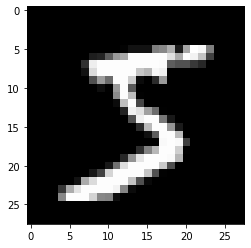

In [2]:
#================loding MNIST dataset===================================
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data
plt.imshow(x_train[0], cmap="gray")
plt.show()


In [3]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train_new =  x_train[10000:]
y_train_new = y_train[10000:]

In [4]:
#one hot encoding 
y_train_new = to_categorical(y_train_new)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [5]:
print(x_train_new.shape)
print(x_val.shape)
print(x_test.shape)


(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [6]:
print(y_train_new.shape)
print(y_val.shape)
print(y_test.shape)


(50000, 10)
(10000, 10)
(10000, 10)


(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


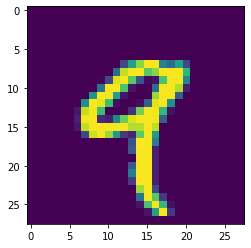

In [7]:

x_train_expand = x_train_new.reshape((x_train_new.shape[0], 28, 28, 1))
x_test_expand = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_val_expand = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_train_expand = x_train_expand.astype('float16')
x_test_expand = x_test_expand.astype('float16')
print(x_train_expand.shape)
print(x_test_expand.shape)
print(x_val_expand.shape)
plt.imshow(x_train[4])


In [8]:
x_train_expand = x_train_expand / 255.0
x_test_expand = x_test_expand / 255.0

In [9]:
model = tf.keras.Sequential()
model.add(Conv2D(8, kernel_size=5, activation='relu',strides =(1,1),padding='same',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid'))
model.add(Conv2D(16, kernel_size=3, activation='relu',padding = 'same'))
model.add(Flatten())
model.add(Dense(32,activation='softmax'))
model.add(Dense(10,activation='softmax'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                100384    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 102,090
Trainable params: 102,090
Non-trainable params: 0
__________________________________________________

In [11]:
epochs_value = 20

In [12]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x= x_train_expand, y = y_train_new, validation_data=(x_val_expand,y_val) , epochs=epochs_value)
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Epoch 1/20
1563/1563 [==============================] - 38s 4ms/step - loss: 1.6959 - accuracy: 0.5533 - val_loss: 0.9722 - val_accuracy: 0.5898
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8694 - accuracy: 0.6046 - val_loss: 0.7803 - val_accuracy: 0.5949
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7027 - accuracy: 0.6118 - val_loss: 0.6942 - val_accuracy: 0.6570
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5546 - accuracy: 0.7317 - val_loss: 0.5805 - val_accuracy: 0.6977
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4514 - accuracy: 0.7899 - val_loss: 0.5909 - val_accuracy: 0.7553
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3078 - accuracy: 0.8960 - val_loss: 0.5569 - val_accuracy: 0.7825
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1861 - accuracy: 0.9781 - val_loss: 0.4583 - val_accuracy

In [13]:
test_loss, test_acc = model.evaluate(x = x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9849

Test accuracy: 0.9848999977111816


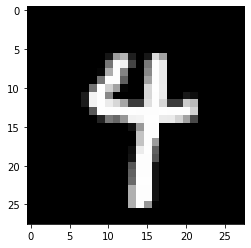

predicted Value: 4


In [14]:

predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="gray")
plt.show()
print('predicted Value:',np.argmax(predictions[565])) # Print out the number


In [15]:
dict1 = model_history.history

loss1= dict1['loss']
val_loss1 = dict1['val_loss']

acc1 = dict1['accuracy']
val_acc1 = dict1['val_accuracy']

In [17]:
epochs1 = range(1,len(loss1)+1)

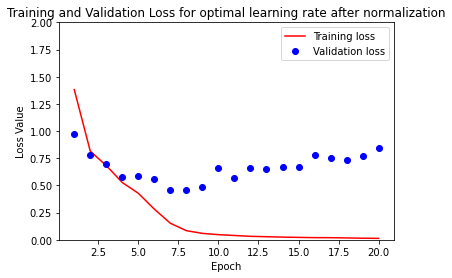

In [18]:
plt.figure()

plt.plot(epochs1, loss, 'r', label='Training loss')
plt.plot(epochs1, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss for optimal learning rate after normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 2])
plt.legend()
plt.show()


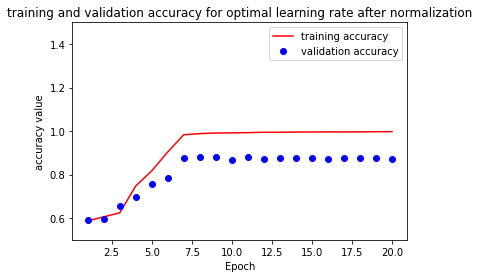

In [19]:
plt.figure()
plt.plot(epochs1, acc1, 'r', label = 'training accuracy')
plt.plot(epochs1,val_acc1,'bo',label='validation accuracy')
plt.title('training and validation accuracy for optimal learning rate after normalization')
plt.xlabel('Epoch')
plt.ylabel('accuracy value')
plt.ylim([0.5,1.5])
plt.legend()
plt.show()

In [20]:
#implementing same shallow network with a different learning rate 
model.compile(optimizer=Adam(learning_rate=1), loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x= x_train_expand, y = y_train_new, validation_data=(x_val_expand,y_val) , epochs=epochs_value)
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6497 - accuracy: 0.1158 - val_loss: 2.6870 - val_accuracy: 0.1127
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.4982 - accuracy: 0.1012 - val_loss: 2.5067 - val_accuracy: 0.0863
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.4977 - accuracy: 0.1028 - val_loss: 2.4957 - val_accuracy: 0.0991
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.4978 - accuracy: 0.1006 - val_loss: 2.4577 - val_accuracy: 0.1014
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.5020 - accuracy: 0.0984 - val_loss: 2.4010 - val_accuracy: 0.1127
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.5001 - accuracy: 0.1013 - val_loss: 2.6437 - val_accuracy: 0.0863
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.5021 - accuracy: 0.1020 - val_loss: 2.4483 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x = x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)
predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="gray")
plt.show()
print('predicted Value:',np.argmax(predictions[565])) # Print out the number

In [ ]:
dict2 = model_history.history

loss2= dict2['loss']
val_loss2 = dict2['val_loss']

acc2 = dict2['accuracy']
val_acc2 = dict2['val_accuracy']

In [ ]:
#visualizing result
plt.figure()

plt.plot(epochs1, loss2, 'r', label='Training loss')
plt.plot(epochs1, val_loss2, 'bo', label='Validation loss')
plt.title('Training and Validation Loss for learning rate = 1 after normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([2.25, 2.7])
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(epochs1, acc2, 'r', label = 'training accuracy')
plt.plot(epochs1,val_acc2,'bo',label='validation accuracy')
plt.title('training and validation accuracy for learning rate = 1 after normalization')
plt.xlabel('Epoch')
plt.ylabel('accuracy value')
plt.ylim([0.075,0.125])
plt.legend()
plt.show()

In [ ]:
#model for the learning rate 0.0000001
model.compile(optimizer=Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x= x_train_expand, y = y_train_new, validation_data=(x_val_expand,y_val) , epochs=epochs_value)
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

In [ ]:
test_loss, test_acc = model.evaluate(x = x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)
predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="gray")
plt.show()
print('predicted Value:',np.argmax(predictions[565])) # Print out the number

In [ ]:
dict3 = model_history.history

loss3= dict3['loss']
val_loss3 = dict3['val_loss']

acc3 = dict3['accuracy']
val_acc3 = dict3['val_accuracy']

In [ ]:
#visualizing result
plt.figure()

plt.plot(epochs1, loss3, 'r', label='Training loss')
plt.plot(epochs1, val_loss3, 'bo', label='Validation loss')
plt.title('Training and Validation Loss for learning rate = 0.0000001 after normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([2.6, 2.675])
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(epochs1, acc3, 'r', label = 'training accuracy')
plt.plot(epochs1,val_acc3,'bo',label='validation accuracy')
plt.title('training and validation accuracy for learning rate = 0.0000001 after normalization')
plt.xlabel('Epoch')
plt.ylabel('accuracy value')
plt.ylim([0.07,0.105])
plt.legend()
plt.show()